In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings(action='ignore')

#### Linear regression with one variable

In [2]:
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [3]:
#Ex. 1.
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
#Ex. 2.
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


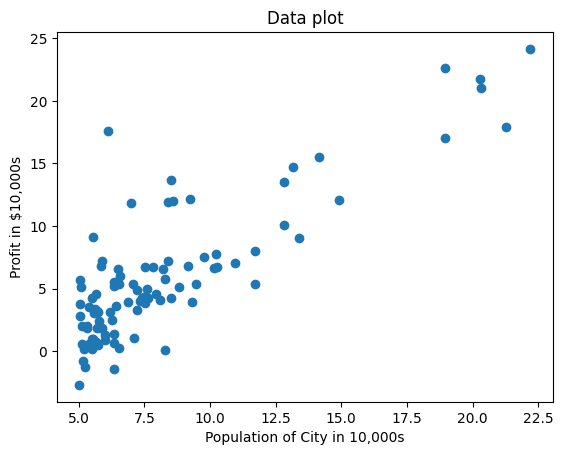

In [5]:
x = data.values[:, 0]
y = data.values[:, 1]
# print(x.shape)
# print(y.shape)

plt.scatter(x, y)
plt.title("Data plot")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

In [6]:
#Ex. 3.
data.insert(0, "Theta", [1 for i in range(data.shape[0])])
data.head(5)

,Theta,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
#Ex. 4.
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [8]:
#Ex. 5.
def h(X, theta):
    return theta.T @ X

In [9]:
def computeCost(X, y, theta) -> float:
    cost = np.sum(np.square(h(X, theta) - y))
    cost = cost / (2*X.shape[1])
    return cost

In [10]:
#Ex. 6.
print(f"Cost function equals to: {computeCost(X, y, theta)}")

Cost function equals to: 32.072733877455676


In [11]:
#Ex. 7.
def simple_gradient(X, y, theta, alpha: float, it: int):
    cost = []
    for i in range(it):
        theta = theta - alpha * (1 / X.shape[1]) * (((theta.T @ X)-y) @ X.T).T
        cost.append(computeCost(X,y, theta))
    return theta, cost

In [12]:
#Ex. 8,9.
theta_optimal, cost = simple_gradient(X, y, theta, alpha=0.01, it=1000)
print(f"cost = {cost[-1]}")
print(f"theta optimal = {theta_optimal}")

cost = 4.515955503078913
theta optimal = [[-3.24140214]
 [ 1.1272942 ]]


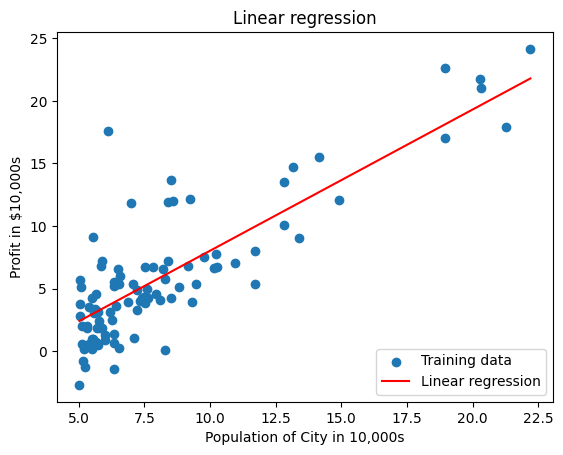

In [13]:
def linear_function(a: float,b:float, x_axis) -> float:
    return a*x_axis + b

coeff_a = theta_optimal[1][0]
coeff_b = theta_optimal[0][0]
x_axis = np.linspace(data.Population.min(), data.Population.max())
plt.scatter(x=data.Population, y=data.Profit, label="Training data")
plt.plot(x_axis, linear_function(coeff_a, coeff_b, x_axis), '-r', label='Linear regression')
plt.title("Linear regression")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(loc="lower right")
plt.show()

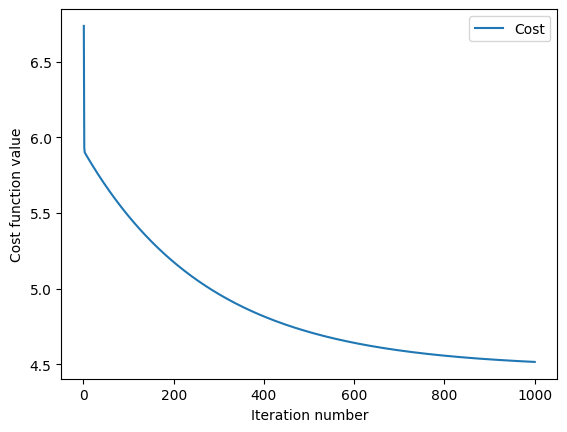

In [14]:
iterations = np.arange(1, len(cost) + 1)
plt.plot(iterations, cost, label="Cost")
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")
plt.legend()
plt.show()


### Linear regression with multiple variables

In [15]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head(10)

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [16]:
normalized_df = (data2 - data2.mean()) / data2.std()
normalized_df.head(10)

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


In [17]:
x = normalized_df.values[:, 0:2]
y = normalized_df.values[:, 2]
ones = np.stack([np.ones(x.shape[0], dtype=np.float32)], axis=0)
X = np.concatenate((ones.T, x), axis=1).T
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)
# print(X.shape)
# print(y.shape)
# print(theta.shape)


In [18]:
print(f"Cost function equals to: {computeCost(X, y, theta)}")

Cost function equals to: 0.4893617021276595


In [19]:
theta_optimal, cost = simple_gradient(X, y, theta, alpha=0.01, it=1000)
print(f"cost = {cost[-1]}")
print(f"theta optimal = {theta_optimal}")

cost = 0.1307033696077189
theta optimal = [[-1.10656165e-16]
 [ 8.78503652e-01]
 [-4.69166570e-02]]


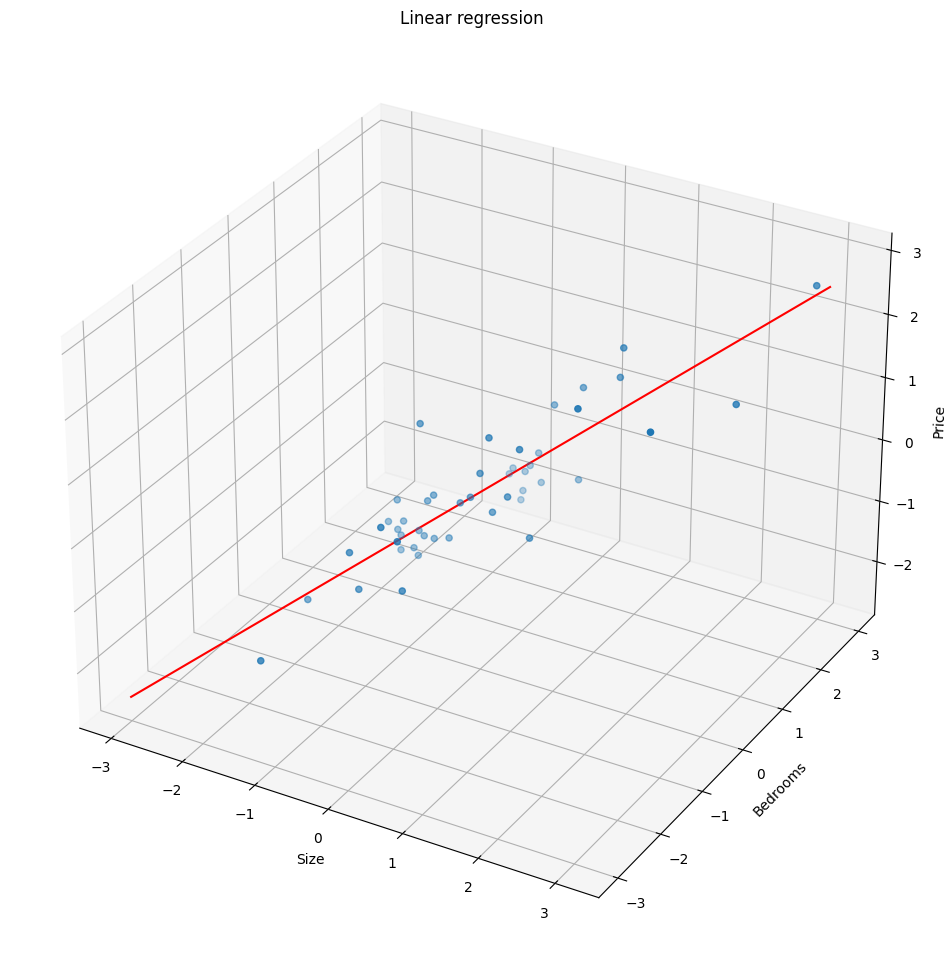

In [20]:
xx = np.linspace(-3,3, len(normalized_df.Size))
yy = np.linspace(-3,3, len(normalized_df.Bedrooms))
coeff_a = theta_optimal[2][0]
coeff_b = theta_optimal[1][0]
coeff_c = theta_optimal[0][0]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(normalized_df.Size, normalized_df.Bedrooms, normalized_df.Price)
ax.plot(xx,yy, coeff_c + coeff_b * xx + coeff_a * yy, '-r')
ax.set_xlabel("Size")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.set_title("Linear regression")
plt.show()

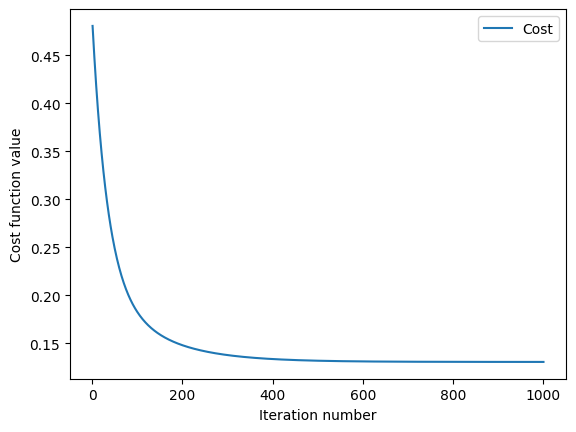

In [21]:
iterations = np.arange(1, len(cost) + 1)
plt.plot(iterations, cost, label="Cost")
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")
plt.legend()
plt.show()

#### Linear regression - Python packages


In [22]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [23]:
# Data import
path2 = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path2, header=None, names=['Size', 'Bedrooms', 'Price'])

##### LogisticRegression

In [24]:
#Normalization
normalized_df = (data2 - data2.mean()) / data2.std()
# Split into train and test sets (70-30%)
X_train, X_test, y_train, y_test = train_test_split(normalized_df[['Size', 'Bedrooms']], normalized_df['Price'], test_size=0.3, random_state=2)
# Creating an object
regr = linear_model.LinearRegression()
# Learning model on training data
regr.fit(X_train, y_train)
# Predicting values using test data
y_predicted = regr.predict(X_test)

# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)

#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [0.87347386 0.01235155]
Residual sum of squares: 0.14238327576733006


##### Ridge

In [25]:
#Normalization
normalized_df = (data2 - data2.mean()) / data2.std()
# Split into train and test sets (70-30%)
X_train, X_test, y_train, y_test = train_test_split(normalized_df[['Size', 'Bedrooms']], normalized_df['Price'], test_size=0.3, random_state=2)
# Creating an object
regr = linear_model.Ridge(alpha=0.5)
# Learning model on training data
regr.fit(X_train, y_train)
# Predicting values using test data
y_predicted = regr.predict(X_test)

# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)

#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [0.8545426  0.02108159]
Residual sum of squares: 0.14291018725513246


##### Lasso

In [26]:
#Normalization
normalized_df = (data2 - data2.mean()) / data2.std()
# Split into train and test sets (70-30%)
X_train, X_test, y_train, y_test = train_test_split(normalized_df[['Size', 'Bedrooms']].to_numpy(), normalized_df['Price'].to_numpy(), test_size=0.3, random_state=2)
regr = linear_model.Lasso(alpha = 0.05)
# Learning model on training data
regr.fit(X_train, y_train)
# Predicting values using test data
y_predicted = regr.predict(X_test)

# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)

#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [0.82557115 0.        ]
Residual sum of squares: 0.13412297326239614


##### ElasticNet

In [27]:
#Normalization
normalized_df = (data2 - data2.mean()) / data2.std()
# Split into train and test sets (70-30%)
X_train, X_test, y_train, y_test = train_test_split(normalized_df[['Size', 'Bedrooms']].to_numpy(), normalized_df['Price'].to_numpy(), test_size=0.3, random_state=2)
# Creating an object
regr = linear_model.ElasticNet(alpha=0.05)
# Learning model on training data
regr.fit(X_train, y_train)
# Predicting values using test data
y_predicted = regr.predict(X_test)

# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)


#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [0.82535642 0.00971665]
Residual sum of squares: 0.13684913058922085
